<a href="https://colab.research.google.com/github/tspacel/sta141bfinal/blob/main/seq_alignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install biopython
!pip install biotite
from Bio.Seq import Seq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from Bio import SeqIO
from Bio import AlignIO

In [7]:
RABA1e = SeqIO.read("/content/RABA1e.faa", "fasta")
RABA1 = SeqIO.read("/content/Raba1.faa", "fasta")
RABA1h = SeqIO.read("/content/Raba1h.faa", "fasta")
RABA5c = SeqIO.read("/content/Raba5c.faa", "fasta")

In [8]:
for seq_record in SeqIO.parse('/content/RABA1e.faa', "fasta"):
  RABA1e_id=str(seq_record.id)
  print(RABA1e_id)
  RABA1e_seq=str(seq_record.seq)
  print(RABA1e_seq)
for seq_record in SeqIO.parse('/content/Raba1.faa', "fasta"):
  RABA1_id=str(seq_record.id)
  print(RABA1_id)
  RABA1_seq=str(seq_record.seq)
  print(RABA1_seq)
for seq_record in SeqIO.parse('/content/Raba1h.faa', "fasta"):
  RABA1h_id=str(seq_record.id)
  print(RABA1h_id)
  RABA1h_seq=str(seq_record.seq)
  print(RABA1h_seq)
for seq_record in SeqIO.parse('/content/Raba5c.faa', "fasta"):
  RABA5c_id=str(seq_record.id)
  print(RABA5c_id)
  RABA5c_seq=str(seq_record.seq)
  print(RABA5c_seq)

NP_193578.1
MGAYRADDDYDYLFKLVLIGDSGVGKSNLLSRFTRNEFSIESKSTIGVEFATRSVHVDEKIIKAQLWDTAGQERYRAITSAYYRGAVGALLVYDITRHITFENVERWLKELRDHTDANVVIMLVGNKADLRHLRAVPTEEARSFSERENMFFMETSALDATNVEQAFTHVLTQIYRVMSRKALDGTGDPMSLPKGQTIDIGNKDDVTAVKSSGCCSG
XP_001328031.1
MESSSTFKFIIIGSSGVGKTALLRRLVENKFVHDQQSTIGVEFDSTSIEVDDQVVKLQIWDTAGQERFRSIAKAYFRNAVGVVLVFDVTERRTFDDVNMWLNDVHSLCDPSARVILVGNKTDLADSRVIPVSEAEAYANHRKLAYIETSARAGDNVKAVFTKLATEVYRSSAKDPSVNPKSITATGSTTEKSGCC
XP_002881315.1
MGTYKAEDDYDYLFKVVLTGDSGVGKSNLLSRFTRNDFSHDSRSTIGVEFATRSIQVDDKIVKAQIWDTAGQERYRAITSAYYRGAVGALLVYDVTRHVTFENVERWLKELRDHTDANTVIMLVGNKADLNHLRAISTEEVKDFAERENTFFMETSALEAINVENAFTEVLTQIYRVVSKKALDAGDDPTTALPKGQMINVGSRDDVSAVKKSGCCAT
XP_020675035.1
MDEENGEEYLFKVVIIGDSAVGKSNLLSRYARNEFNINTKATIGVEFQTQSLEIDGREVKAQIWDTAGQERFRAVTSAYYRGAVGALVVYDISRSSTFESVQRWLQELNTHSDTTIAKMLVGNKCDLEDIRAVSVEEGKSLAEAEGLFFIETSALDSTNVKAAFEIVIKEIYNNISRKSLNSDSYKGELSLNRVTLESNGTDGSKQGSSKFTCC


In [22]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import MuscleCommandline

sequences = [RABA1e_seq,
             RABA1_seq,
             RABA1h_seq,
             RABA5c_seq,]

longest_length = max(len(s) for s in sequences)
padded_sequences = [s.ljust(longest_length, '-') for s in sequences]
records = (SeqRecord(Seq(s)) for s in padded_sequences)

SeqIO.write(records, "RABali.fasta", "fasta")

from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input="RABali.fasta", out="msa.txt")
print(cline)


muscle -in RABali.fasta -out msa.txt


In [21]:
for seq_record in SeqIO.parse('/content/msa_example.fasta', "fasta"):
  alignement_id=str(seq_record.id)
  print(alignement_id)
  alignement_seq=str(seq_record.seq)
  print(alignement_seq)

<unknown
MGAYRADDDYDYLFKLVLIGDSGVGKSNLLSRFTRNEFSIESKSTIGVEFATRSVHVDEKIIKAQLWDTAGQERYRAITSAYYRGAVGALLVYDITRHITFENVERWLKELRDHTDANVVIMLVGNKADLRHLRAVPTEEARSFSERENMFFMETSALDATNVEQAFTHVLTQIYRVMSRKALDGTGDPMSLPKGQTIDIGNKDDVTAVKSSGCCSG-
<unknown
MESSSTFKFIIIGSSGVGKTALLRRLVENKFVHDQQSTIGVEFDSTSIEVDDQVVKLQIWDTAGQERFRSIAKAYFRNAVGVVLVFDVTERRTFDDVNMWLNDVHSLCDPSARVILVGNKTDLADSRVIPVSEAEAYANHRKLAYIETSARAGDNVKAVFTKLATEVYRSSAKDPSVNPKSITATGSTTEKSGCC-----------------------
<unknown
MGTYKAEDDYDYLFKVVLTGDSGVGKSNLLSRFTRNDFSHDSRSTIGVEFATRSIQVDDKIVKAQIWDTAGQERYRAITSAYYRGAVGALLVYDVTRHVTFENVERWLKELRDHTDANTVIMLVGNKADLNHLRAISTEEVKDFAERENTFFMETSALEAINVENAFTEVLTQIYRVVSKKALDAGDDPTTALPKGQMINVGSRDDVSAVKKSGCCAT
<unknown
MDEENGEEYLFKVVIIGDSAVGKSNLLSRYARNEFNINTKATIGVEFQTQSLEIDGREVKAQIWDTAGQERFRAVTSAYYRGAVGALVVYDISRSSTFESVQRWLQELNTHSDTTIAKMLVGNKCDLEDIRAVSVEEGKSLAEAEGLFFIETSALDSTNVKAAFEIVIKEIYNNISRKSLNSDSYKGELSLNRVTLESNGTDGSKQGSSKFTCC----


In [23]:
import numpy as np
import biotite
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.align as align
import biotite.database.entrez as entrez


# 5 example sequences (bacterial luciferase variants)
uids = [
    RABA1e_id, RABA1_id, RABA1h_id, RABA5c_id
]
# Download these sequences as one file from NCBI
file_name = entrez.fetch_single_file(
    uids, biotite.temp_file("fasta"), db_name="protein", ret_type="fasta"
)

# Read each sequence in the file as 'ProteinSequence' object
fasta_file = fasta.FastaFile()
fasta_file.read(file_name)
sequences = list(fasta.get_sequences(fasta_file).values())

# BLOSUM62
substitution_matrix = align.SubstitutionMatrix.std_protein_matrix()
# Matrix that will be filled with pairwise sequence identities
identities = np.ones((len(sequences), len(sequences)))
# Iterate over sequences
for i in range(len(sequences)):
    for j in range(i):
        # Align sequences pairwise
        alignment = align.align_optimal(
            sequences[i], sequences[j], substitution_matrix
        )[0]
        # Calculate pairwise sequence identities and fill matrix
        identity = align.get_sequence_identity(alignment)
        identities[i,j] = identity
        identities[j,i] = identity

print(identities)

[[1.         0.40930233 0.78899083 0.53456221]
 [0.40930233 1.         0.43981481 0.42056075]
 [0.78899083 0.43981481 1.         0.51834862]
 [0.53456221 0.42056075 0.51834862 1.        ]]


In [29]:
from Bio import SeqIO
handle = open("/content/Q72L_EGFP-C_2023-02-02_G06.ab1", "rb")
record=SeqIO.read(handle, "abi")

{'sample_well': b'G6',
 'dye': b'Z-BigDyeV3',
 'polymer': b'POP7                            ',
 'machine_model': b'3730',
 'run_start': '2023-02-02 01:05:57',
 'run_finish': '2023-02-02 03:13:59',
 'abif_raw': {'AEPt1': 17416,
  'AEPt2': 17416,
  'APFN2': b'3730BDTv3-KB-DeNovo_v5.2',
  'APXV1': b'2',
  'APrN1': b'3730BDTv3-KB-DeNovo_v5.2',
  'APrV1': b'1',
  'APrX1': b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?>\n<AnalysisProtocolContainer doAnalysis="true" name="3730BDTv3-KB-DeNovo_v5.2" guid="DummyGUID" version="2"><AnalysisProtocol version="6" doAnalysis="true" guid="DummyGUID" name="Basecaller"><AnalysisSettings version="6" name="BasecallerSettings"><Parameter name="BasecallerName"><value>KB.bcp</value></Parameter><Parameter name="Description"><value>This is the default analysis protocol for 3730 for BDTv3 and POP7 polymer using the KB Basecaller. Phred files will be created after user analyzes and saves samples </value></Parameter><Parameter name="MobilityFileName"><va

In [30]:
import json
print(record.annotations['abif_raw']['DATA9'])
print(record.annotations['abif_raw']['DATA10'])
print(record.annotations['abif_raw']['DATA11'])
print(record.annotations['abif_raw']['DATA12'])

(139, 142, 150, 164, 188, 220, 251, 276, 293, 307, 323, 342, 364, 387, 410, 432, 453, 475, 497, 521, 548, 576, 604, 630, 651, 668, 681, 693, 705, 721, 739, 760, 782, 803, 822, 838, 850, 859, 864, 868, 873, 879, 889, 901, 912, 920, 922, 919, 913, 908, 908, 915, 926, 936, 942, 939, 928, 911, 892, 874, 859, 843, 826, 804, 780, 755, 732, 716, 706, 703, 705, 711, 721, 734, 750, 769, 789, 809, 828, 844, 859, 875, 896, 920, 948, 978, 1004, 1025, 1040, 1049, 1056, 1063, 1070, 1077, 1080, 1077, 1069, 1055, 1040, 1028, 1019, 1015, 1014, 1012, 1006, 997, 985, 971, 956, 942, 930, 920, 911, 903, 893, 881, 863, 839, 809, 772, 731, 689, 647, 607, 570, 534, 501, 467, 434, 399, 363, 326, 289, 253, 219, 190, 165, 143, 126, 110, 97, 84, 73, 64, 57, 52, 49, 48, 48, 47, 46, 44, 42, 40, 39, 38, 39, 39, 38, 36, 32, 28, 24, 22, 21, 22, 23, 24, 23, 19, 15, 11, 7, 5, 5, 6, 6, 6, 6, 5, 4, 5, 5, 6, 7, 8, 8, 8, 9, 9, 8, 8, 9, 9, 11, 13, 15, 17, 18, 20, 22, 27, 35, 48, 64, 84, 108, 136, 167, 201, 238, 275, 312, 345

In [32]:
print(record.annotations['abif_raw']['FWO_1'])
print('PLOC1 is peak_index in Matlab', record.annotations['abif_raw']['PLOC1']) # tuple of int
print('PBAS1 is what base it is', record.annotations['abif_raw']['PBAS1']) # str

b'GATC'
PLOC1 is peak_index in Matlab (2, 25, 36, 43, 56, 67, 83, 94, 103, 115, 147, 157, 178, 191, 205, 218, 232, 251, 259, 270, 281, 294, 313, 321, 333, 346, 357, 370, 382, 395, 407, 418, 427, 434, 443, 457, 470, 486, 498, 511, 522, 532, 544, 558, 570, 583, 594, 608, 620, 630, 643, 656, 670, 683, 693, 705, 716, 728, 739, 749, 759, 771, 785, 796, 809, 821, 833, 846, 856, 867, 880, 891, 902, 915, 926, 938, 948, 959, 971, 985, 995, 1008, 1019, 1029, 1042, 1055, 1067, 1079, 1092, 1103, 1112, 1122, 1133, 1145, 1157, 1167, 1181, 1194, 1206, 1218, 1230, 1243, 1255, 1265, 1278, 1290, 1303, 1315, 1327, 1339, 1348, 1360, 1372, 1383, 1397, 1410, 1421, 1433, 1446, 1457, 1469, 1483, 1495, 1506, 1517, 1528, 1538, 1550, 1562, 1572, 1583, 1596, 1608, 1621, 1633, 1646, 1658, 1671, 1682, 1694, 1706, 1717, 1730, 1741, 1755, 1767, 1778, 1788, 1799, 1811, 1821, 1834, 1847, 1859, 1870, 1881, 1894, 1906, 1918, 1929, 1942, 1954, 1964, 1977, 1989, 2001, 2013, 2025, 2037, 2051, 2062, 2075, 2087, 2098, 2109, 2

In [33]:
from collections import defaultdict

channels = ["DATA9", "DATA10", "DATA11", "DATA12"]
trace = defaultdict(list)
for c in channels:
    trace[c] = record.annotations["abif_raw"][c]

In [41]:
import matplotlib.pyplot as plt 
import numpy as np 

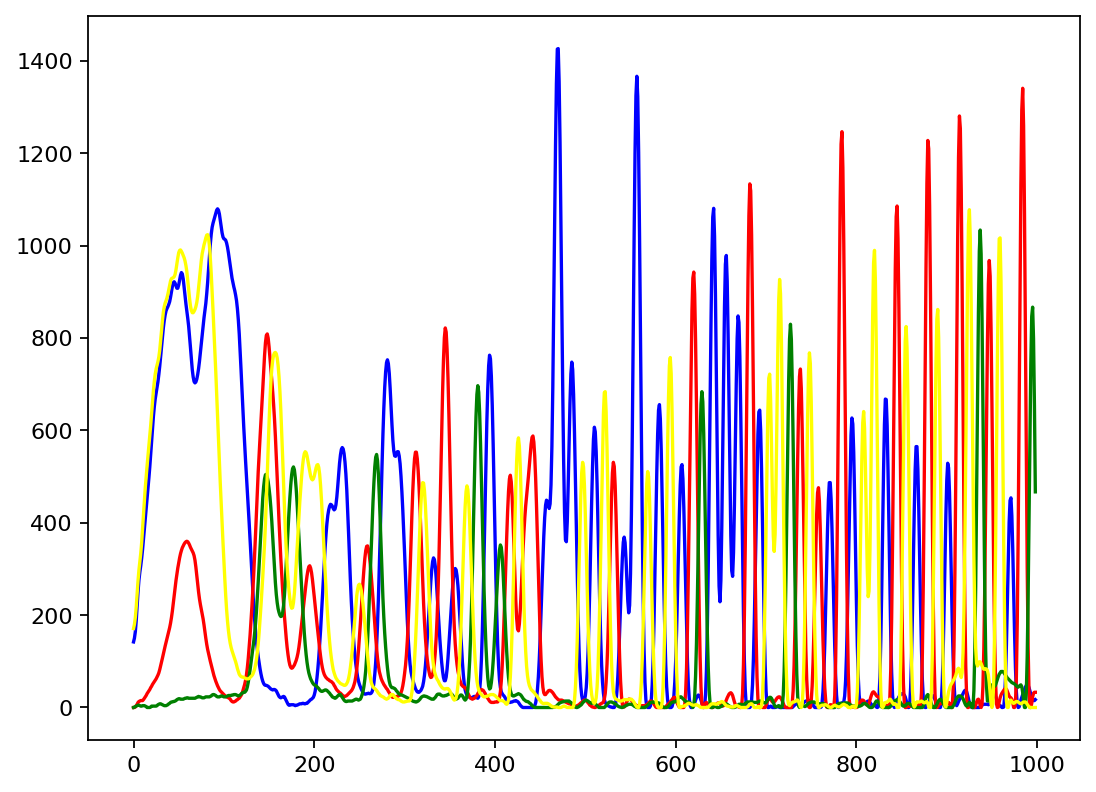

In [52]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=160)

plt.plot(trace["DATA9"][1:1000], color="blue")
plt.plot(trace["DATA10"][1:1000], color="red")
plt.plot(trace["DATA11"][1:1000], color="green")
plt.plot(trace["DATA12"][1:1000], color="yellow")
plt.show()